In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [45]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [46]:
init_notebook_mode(connected=True)
cf.go_offline()

In [47]:
df=pd.read_csv('STEELPLATES.csv')

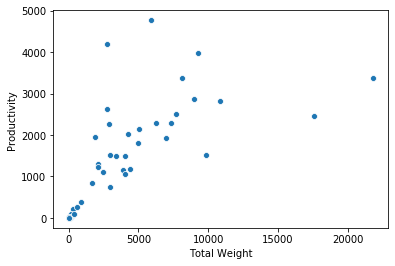

In [48]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [49]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.00000,50.000000,46.000000
mean,1294.160000,192840.580000,6.66580,8.747400,3666.715240,0.036200,0.003620,0.0,1.257000,0.07900,1315.323600,31310.662391
std,1058.852042,2097.746109,18.67928,26.194979,4533.761685,0.046065,0.004607,0.0,8.374815,0.39899,1291.664949,12890.849648
min,751.000000,191029.000000,0.00000,0.000000,2.089000,0.000000,0.000000,0.0,0.000000,0.00000,0.890000,4383.700000
25%,942.250000,191947.250000,0.00000,0.000000,193.981033,0.000000,0.000000,0.0,0.000000,0.00000,72.782500,21192.900000
50%,1094.500000,192461.000000,0.00000,0.000000,2613.524500,0.025000,0.002500,0.0,0.000000,0.00000,1167.180000,32277.000000
75%,1392.750000,192992.750000,0.00000,0.000000,5019.148500,0.050000,0.005000,0.0,0.000000,0.00000,2241.292500,41086.500000
max,8426.000000,200783.000000,75.25000,133.950000,21805.819622,0.220000,0.022000,0.0,59.180000,2.65000,4766.490000,52497.000000


In [50]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [51]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(lm.intercept_)

742.2940096646219


In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.194999


In [54]:
predictions = lm.predict(X_test)

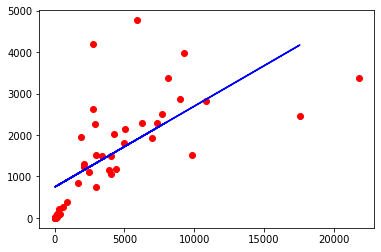

In [55]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 693.6699064369044
MSE: 614468.7112068343
RMSE: 783.88054651639
r2_score: 0.49029858431649764


In [57]:
#joblib.dump(lm,"Acetic_Acid.pkl")#only execute if rmse is less than half of mean of productivity